In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.set_option("display.max_columns", 500)

In [5]:
pd.set_option("display.width", 500)

In [6]:
df = pd.read_csv("D:\DataAnalysis\CO2EmissionsDataForCanadianVehicles\datacamp_workspace_export_2023-05-22 01_16_15.csv")

In [7]:
"""
"Make" - The company that manufactures the vehicle.
"Model" - The vehicle's model.
"Vehicle Class" - Vehicle class by utility, capacity, and weight.
"Engine Size(L)" - The engine's displacement in liters.
"Cylinders" - The number of cylinders.
"Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
"Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
"Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
"CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving.
"""

'\n"Make" - The company that manufactures the vehicle.\n"Model" - The vehicle\'s model.\n"Vehicle Class" - Vehicle class by utility, capacity, and weight.\n"Engine Size(L)" - The engine\'s displacement in liters.\n"Cylinders" - The number of cylinders.\n"Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.\n"Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.\n"Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).\n"CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving.\n'

In [8]:
def check_df(dataframe, head = 5):
    print("-----------------------Shape-----------------------")
    print(dataframe.shape)
    print("-----------------------Dtypes-----------------------")
    print(dataframe.dtypes)
    print("-----------------------Head-----------------------")
    print(dataframe.head(head))
    print("-----------------------Tail-----------------------")
    print(dataframe.tail(head))
    print("-----------------------NA-----------------------")
    print(dataframe.isnull().sum())
    print("-----------------------Quantiles-----------------------")
    print(dataframe.describe())

In [9]:
check_df(df)

-----------------------Shape-----------------------
(2222, 9)
-----------------------Dtypes-----------------------
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption Comb (L/100 km)    float64
CO2 Emissions(g/km)                   int64
dtype: object
-----------------------Head-----------------------
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)
0  ACURA         ILX       COMPACT             2.0          4          AS5         Z                               8.5                  196
1  ACURA         ILX       COMPACT             2.4          4           M6         Z                               9.6                  221
2  A

In [10]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2222
Variables: 9
cat_cols: 2
num_cols: 2
cat_but_car: 3
num_but_cat: 0


In [12]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("------------------------------------------------------------------")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show()

                          Vehicle Class      Ratio
Vehicle Class                                     
COMPACT                             361  16.246625
MID-SIZE                            361  16.246625
SUV - SMALL                         338  15.211521
SUV - STANDARD                      210   9.450945
FULL-SIZE                           179   8.055806
TWO-SEATER                          164   7.380738
SUBCOMPACT                          157   7.065707
PICKUP TRUCK - STANDARD             114   5.130513
MINICOMPACT                         108   4.860486
STATION WAGON - SMALL                71   3.195320
VAN - PASSENGER                      44   1.980198
PICKUP TRUCK - SMALL                 34   1.530153
MINIVAN                              29   1.305131
VAN - CARGO                          22   0.990099
SPECIAL PURPOSE VEHICLE              16   0.720072
STATION WAGON - MID-SIZE             14   0.630063
------------------------------------------------------------------


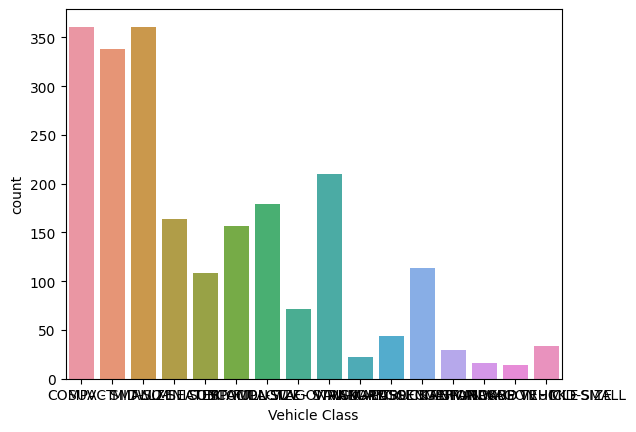

           Fuel Type      Ratio
Fuel Type                      
X               1051  47.299730
Z                955  42.979298
E                156   7.020702
D                 60   2.700270
------------------------------------------------------------------


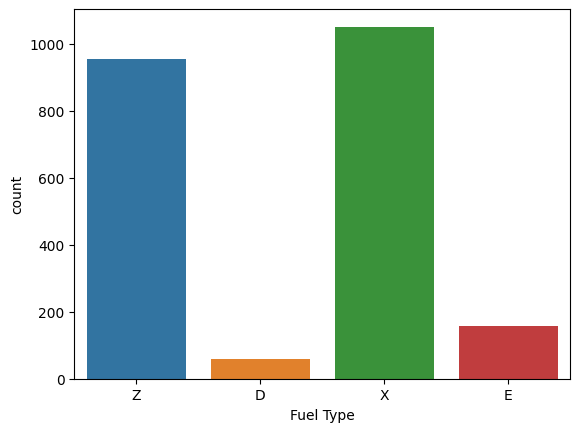

In [13]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

In [14]:
def num_summary(dataframe, numerical_col, plot = False):
    print(dataframe[numerical_col].describe().T)
    if plot:
        dataframe[numerical_col].hist()
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show(block = False)

count    2222.000000
mean        3.265482
std         1.389454
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.400000
Name: Engine Size(L), dtype: float64


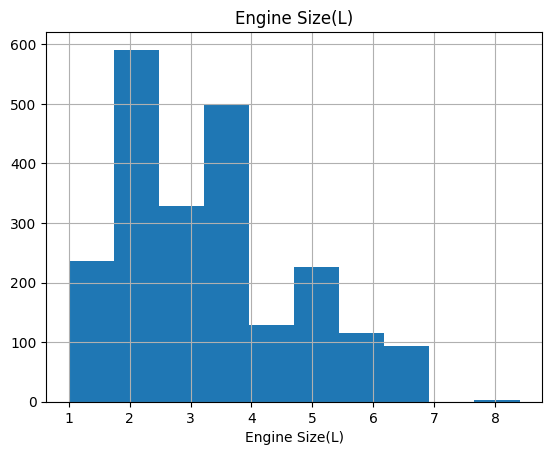

count    2222.000000
mean       11.277363
std         3.249218
min         4.700000
25%         8.900000
50%        10.700000
75%        12.875000
max        26.100000
Name: Fuel Consumption Comb (L/100 km), dtype: float64


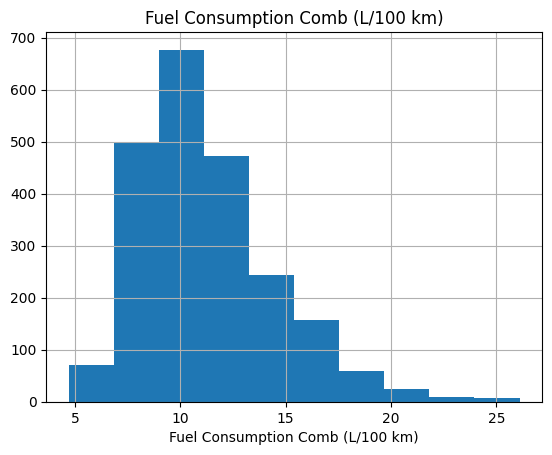

In [15]:
for col in num_cols:
    num_summary(df, col, plot = True)

In [16]:
#What is the median engine size in liters?

In [17]:
df["Engine Size(L)"].median()

3.0

In [18]:
#What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

In [19]:
df.groupby("Fuel Type").agg({"Fuel Consumption Comb (L/100 km)": "mean"})

,Fuel Consumption Comb (L/100 km)
Fuel Type,
D,8.340000
E,17.574359
X,10.279924
Z,11.530995


In [20]:
#What is the correlation between fuel consumption and CO2 emissions?

In [21]:
df["Fuel Consumption Comb (L/100 km)"].corr(df["CO2 Emissions(g/km)"])

0.9015943465173982

In [22]:
#Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

In [23]:
suv_small = df[df["Vehicle Class"] == "SUV - SMALL"]
mid_size = df[df["Vehicle Class"] == "MID-SIZE"]
suv_small_mean = suv_small["CO2 Emissions(g/km)"].mean()
mid_size_mean = mid_size["CO2 Emissions(g/km)"].mean()
if suv_small_mean > mid_size_mean:
    print("SUV - SMALL Vehicle Class is bigger")
else:
    print("MID-SIZE Vehicle Class is bigger")

SUV - SMALL Vehicle Class is bigger


In [24]:
#What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

In [25]:
df["CO2 Emissions(g/km)"].mean()
engine_size_2 = df[df["Engine Size(L)"] == 2]
engine_size_2["CO2 Emissions(g/km)"].mean()

207.19945355191257

In [26]:
#Any other insights you found during your analysis?

In [27]:
#Scatter plot of Fuel Consumption vs CO2 Emissions

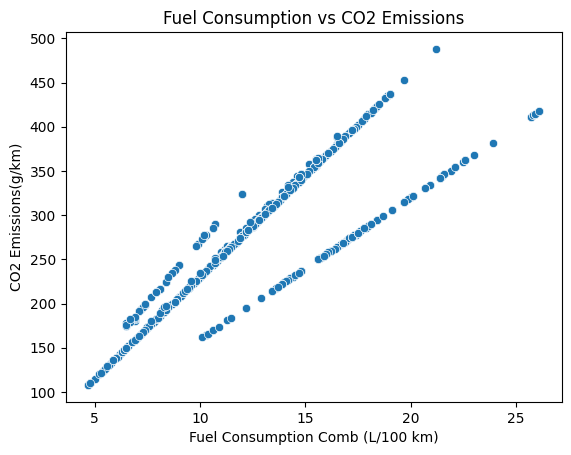

In [28]:
sns.scatterplot(x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)", data = df)
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions(g/km)")
plt.title("Fuel Consumption vs CO2 Emissions")
plt.show()

In [29]:
#*Bu kod, yakıt tüketimi (Fuel Consumption Comb) ve CO2 emisyonu (CO2 Emissions) arasındaki ilişkiyi görselleştirir. Her bir aracın yakıt tüketimi ve CO2 emisyonu değerleri arasında bir nokta yer alır. Bu şekilde, yakıt tüketimi ile CO2 emisyonu arasındaki genel ilişkiyi gözlemleyebilirsiniz.

In [30]:
#Box plot of Engine Size vs CO2 Emissions

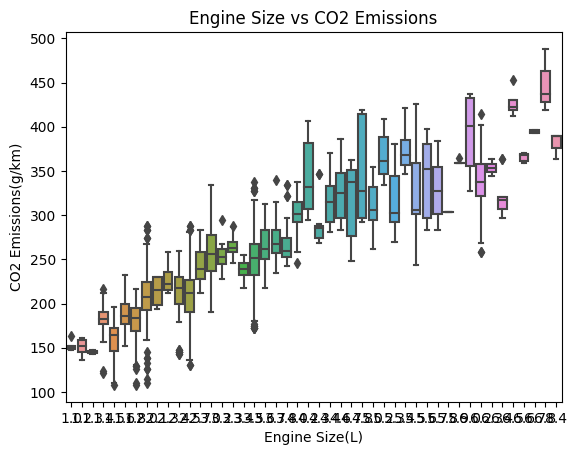

In [31]:
sns.boxplot(x = "Engine Size(L)", y = "CO2 Emissions(g/km)", data = df)
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.title("Engine Size vs CO2 Emissions")
plt.show()

In [32]:
#*Bu kod, motor büyüklüğü (Engine Size) ve CO2 emisyonu (CO2 Emissions) arasındaki ilişkiyi kutu grafiği ile görselleştirir. Bu şekilde, farklı motor boyutlarına sahip araçların CO2 emisyonu dağılımını karşılaştırabilirsiniz.

In [33]:
#Bar plot of Cylinders vs CO2 Emissions

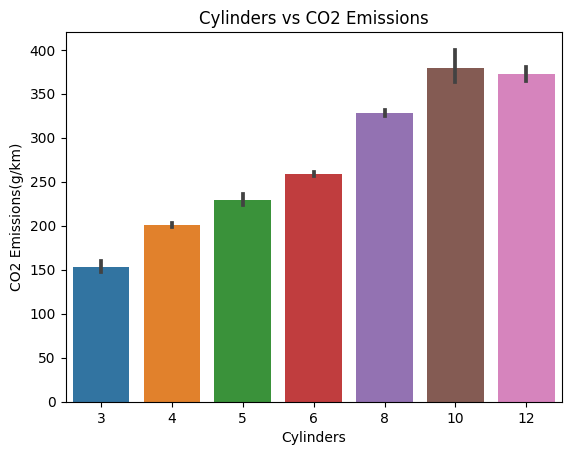

In [34]:
sns.barplot(x = "Cylinders", y = "CO2 Emissions(g/km)", data = df)
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions(g/km)")
plt.title("Cylinders vs CO2 Emissions")
plt.show()

In [35]:
#*Bu kod, silindir sayısı (Cylinders) ve CO2 emisyonu (CO2 Emissions) arasındaki ilişkiyi bar grafiği ile görselleştirir. Bu şekilde, farklı silindir sayısına sahip araçların ortalama CO2 emisyonunu karşılaştırabilirsiniz.

In [36]:
#Box plot of Fuel Type vs CO2 Emissions

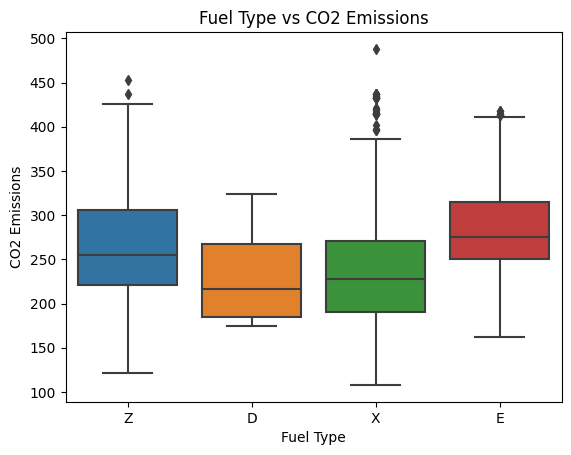

In [37]:
sns.boxplot(x = "Fuel Type", y = "CO2 Emissions(g/km)", data = df)
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Type vs CO2 Emissions")
plt.show()

In [38]:
#*Bu kod, yakıt türü (Fuel Type) ve CO2 emisyonu (CO2 Emissions) arasındaki ilişkiyi kutu grafiği ile görselleştir

In [39]:
#Histogram of Fuel Consumption

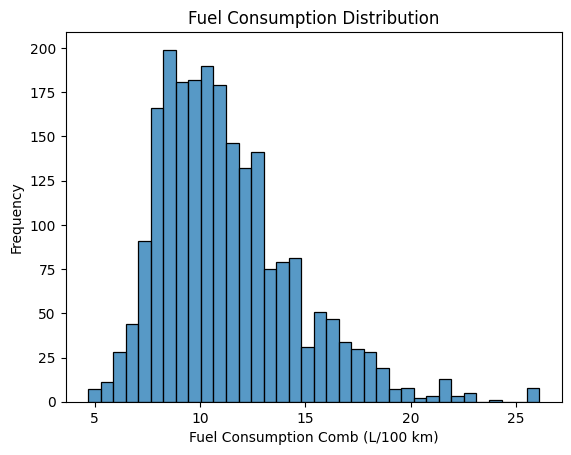

In [40]:
sns.histplot(x = "Fuel Consumption Comb (L/100 km)", data = df)
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("Frequency")
plt.title("Fuel Consumption Distribution")
plt.show()

In [41]:
#*Bu kod, yakıt tüketimi (Fuel Consumption Comb) dağılımını histogram olarak görselleştirir. Bu şekilde, yakıt tüketiminin hangi değerlerde yoğunlaştığını ve genel dağılımını görebilirsiniz.

In [42]:
#Bar plot of Top 10 Most Common Car Makes

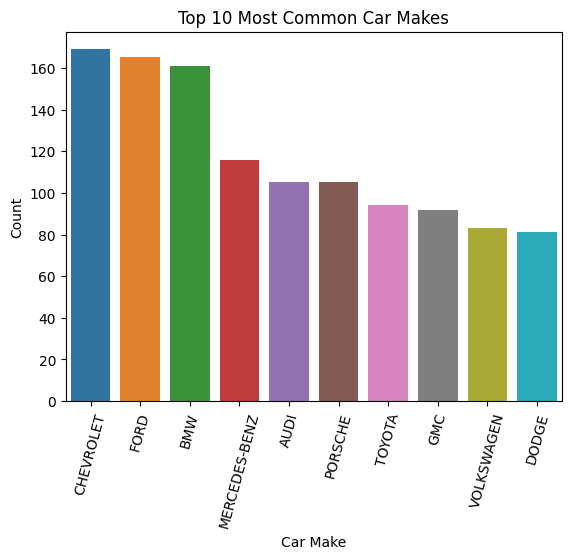

In [45]:
top_10_makes = df["Make"].value_counts().head(10)
sns.barplot(x = top_10_makes.index, y = top_10_makes.values)
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.title("Top 10 Most Common Car Makes")
plt.xticks(rotation = 75)
plt.show()

In [46]:
#*Bu kod, en yaygın araç markalarını bar grafiği olarak görselleştirir. Bu şekilde, hangi araç markalarının veri setinizde en yaygın olduğunu görebilirsiniz.

In [47]:
#Violin plot of Fuel Consumption by Vehicle Class

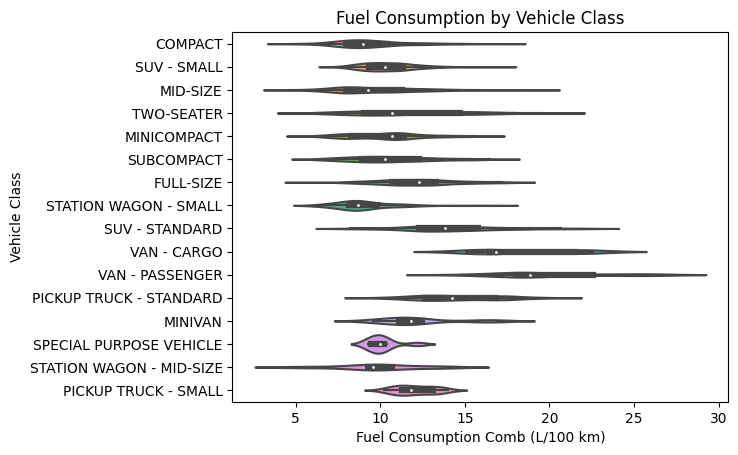

In [48]:
sns.violinplot(x = "Fuel Consumption Comb (L/100 km)", y = "Vehicle Class", data = df)
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("Vehicle Class")
plt.title("Fuel Consumption by Vehicle Class")
plt.show()

In [49]:
#*Bu kod, araç sınıflarına göre yakıt tüketimi dağılımını keman grafiği (violin plot) olarak görselleştirir. Bu şekilde, farklı araç sınıflarının yakıt tüketimi dağılımlarını ve merkezi eğilimlerini karşılaştırabilirsiniz.